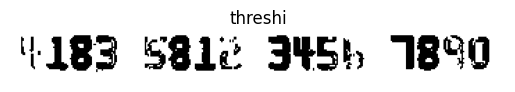

3202
9650


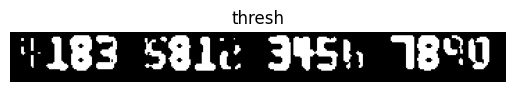

Credit Card #: 679771835481171723447786740


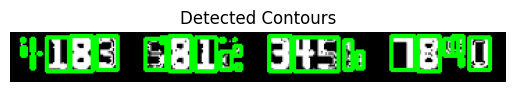

In [155]:
import cv2
import imutils
import numpy as np
from imutils import contours
from matplotlib import pyplot as plt
import pytesseract


def compare_white_black(img):
    # Read the image


  
    # Count white and black pixels
    white_count = cv2.countNonZero(img)
    black_count = img.size - white_count  # Count of black pixels (0)
    print(black_count)
    print(white_count)
    # Compare counts
    return white_count > black_count
   


def showImage(name, image, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')  # Hide axis
    plt.title(name)
    plt.show()
# Define the reference digits based on the provided reference image
FIRST_NUMBER = {
    "3": "American Express",
    "4": "Visa",
    "5": "MasterCard",
    "6": "Discover Card"
}

# Load the reference image of the digits (should be preprocessed with digits only)
ref = cv2.imread('Credit-Card0.png')
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)
ref = cv2.threshold(ref, 10, 255, cv2.THRESH_BINARY_INV)[1]

# Find contours in the reference image
refCnts = cv2.findContours(ref.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
refCnts = imutils.grab_contours(refCnts)
refCnts = contours.sort_contours(refCnts, method="left-to-right")[0]
digits = {}

# Store each digit's region of interest (ROI)
for (i, c) in enumerate(refCnts):
    (x, y, w, h) = cv2.boundingRect(c)
    roi = ref[y:y + h, x:x + w]
    roi = cv2.resize(roi, (57, 88))
    digits[i] = roi

# Load the input image containing only the PAN of the credit card
image = cv2.imread('freq.png.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the gray image to get a binary image
group = cv2.threshold(gray, 55, 255, cv2.THRESH_BINARY_INV )[1]
showImage("threshi",group ,cmap="gray")
group = cv2.medianBlur(group, ksize=7)#7
# Example usage
if compare_white_black(group):
    group=cv2.bitwise_not(group)
    showImage("thresh",group ,cmap="gray")

# Find contours in the binary image
digitCnts = cv2.findContours(group.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
digitCnts = imutils.grab_contours(digitCnts)
digitCnts = contours.sort_contours(digitCnts, method="left-to-right")[0]

output = []

# Loop over each detected contour to identify digits
for c in digitCnts:
    (x, y, w, h) = cv2.boundingRect(c)
    roi = group[y:y + h, x:x + w]
    roi = cv2.resize(roi, (57, 88))
    scores = []

    # Compare each ROI with reference digits to identify the digit
    for (digit, digitROI) in digits.items():
        result = cv2.matchTemplate(roi, digitROI, cv2.TM_CCOEFF)
        (_, score, _, _) = cv2.minMaxLoc(result)
        scores.append(score)

    # Append the recognized digit to the output list
    output.append(str(np.argmax(scores)))

    # Draw the contour on the original image
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw a rectangle around the detected digit

# Print the recognized PAN
print("Credit Card #: {}".format("".join(output)))

# Show the original image with contours drawn
showImage("Detected Contours", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))









